In [2]:
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
from collections import Counter

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
df = pd.read_csv('./data/data_current.csv', sep=';')
df2 = pd.read_csv('./data/data_done.csv', sep=';')

In [4]:
df2 = df2[df2['common'] >= 0]

In [5]:
df = df.append(df2, ignore_index=True) 

In [6]:
df.dtypes

title      object
short      object
text       object
common    float64
dtype: object

In [7]:
df.head(n=5)

,title,short,text,common
0,Поможем 2-летнему Амину дышать!,"Вы можете помочь\nкупить аппарат, который помо...","У двухлетнего Амина неизлечимая болезнь, котор...",0.0
1,"Тимур, ты будешь врачом!",Вы можете помочь\nоплатить реабилитацию для Ти...,Тимур любил общаться с друзьями и мечтать о бу...,0.0
2,Догоним Амину!,"Вы можете помочь\nкупить ортезы, чтобы девочка...","У Амины ДЦП, и она не может полноценно двигать...",0.0
3,Накормим Колю,Вы можете помочь\nкупить лечебное питание для ...,Коля родился настоящим богатырем – весил 4324 ...,0.0
4,Рецепт счастья для Кати,Вы можете помочь\nспасти Катю от редкого генет...,"У Кати редкое генетическое заболевание, при ко...",0.0


In [8]:
df.to_csv('./data/projects_merged.csv', sep=';', index=False)

In [9]:
df.shape

(1574, 4)

In [10]:
print(int(df['common'].sum()), '/', df['common'].count())

575 / 1574


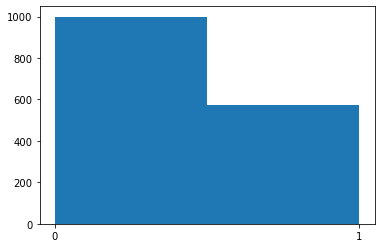

In [11]:
plt.hist(df.common, bins=2, range=[0,1])
plt.xticks([0,1]);

In [12]:
re_punct = re.compile(f'[{string.punctuation}\– ]+')
russian_stopwords = stopwords.words("russian")
morpher = MorphAnalyzer()

def punct(text):
    return re.sub(re_punct, ' ', text)

def clear(arr):
    return [w for w in arr if not w in russian_stopwords]

def lemmatize(arr):
    pass

def prepare_text(text):
    text = punct(text)
    t_arr = clear(text.split())
    return ' '.join(t_arr)

def pos(text):
    tags = [str(morpher.parse(w)[0].tag) for w in text.split(' ')]
    return Counter(tags)

In [13]:
df['prepared'] = df.apply(lambda row: prepare_text(f"{row['title']} {row['short']} {row['text']}"), axis=1)

In [14]:
bag_of_words = set()
bow_tags = set()

for txt in df['prepared'][:5]:
    for w in txt.split(' '):
        bag_of_words.add(w)
        bow_tags = bow_tags | set([str(morpher.parse(w)[0].tag)])

In [15]:
tags_cols = list(bow_tags)

In [16]:
dff = df[['common']].copy()
tags_shape = [df.shape[0], len(tags_cols)]
dff[tags_cols] = np.zeros(tags_shape)

In [17]:
for index, row in df.iterrows():
    pos_dict = pos(row['prepared'])
    for key, value in pos_dict.items():
        if key in bow_tags:
            dff.iloc[index][key] = value

In [18]:
dff.describe()

,common,"INFN,impf,tran","VERB,impf,tran neut,sing,past,indc","ADJF,Qual femn,sing,accs","NOUN,inan,masc plur,nomn","NOUN,inan,femn,Sgtm,Fixd,Abbr,Geox sing,gent","NOUN,inan,femn plur,gent","ADJF,Qual neut,sing,nomn","NOUN,anim,masc,Name sing,accs","ADJF masc,sing,datv",...,PREP,"ADJF,Apro neut,sing,gent","PRTF,impf,intr,pres,actv femn,sing,accs","NOUN,inan,neut,Fixd,Abbr sing,nomn",UNKN,"NPRO,1per plur,nomn","ADJF femn,sing,accs","NOUN,inan,neut plur,loct","VERB,perf,intr plur,past,indc","NOUN,anim,masc plur,ablt"
count,1574.000000,1574.000000,1574.000000,1574.000000,1574.00000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,...,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000
mean,0.365311,3.706480,0.060356,0.879288,2.04892,0.005083,2.404701,1.062262,0.128335,0.257942,...,4.560356,0.265565,0.008259,0.016518,7.123888,0.415502,0.714740,0.222999,1.111182,0.735705
std,0.481670,3.118796,0.253728,1.125632,1.96460,0.071133,2.089420,1.234155,0.558171,0.585519,...,2.762450,0.550671,0.097302,0.210304,3.996251,0.732612,1.086506,0.556261,1.321624,1.281204
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,1.000000,2.00000,0.000000,2.000000,1.000000,0.000000,0.000000,...,4.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,5.000000,0.000000,1.000000,3.00000,0.000000,3.000000,2.000000,0.000000,0.000000,...,6.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,2.000000,1.000000
max,1.000000,23.000000,2.000000,8.000000,12.00000,1.000000,14.000000,7.000000,6.000000,5.000000,...,23.000000,5.000000,2.000000,5.000000,55.000000,6.000000,8.000000,5.000000,9.000000,10.000000


In [19]:
dff.to_csv('./data/train.csv', index=False, sep=';')

In [20]:
from sklearn.feature_extraction.text import HashingVectorizer

In [21]:
vectorizer = HashingVectorizer(n_features=2**10)
hash_cols = [f'hvec_{x}' for x in range(2**10)]

In [22]:
h = np.array(vectorizer.fit_transform(df['prepared']).toarray())

In [23]:
import pickle

In [28]:
with open('./hash_vec.pickle', 'wb') as f:
    pickle.dump(vectorizer, f)

In [29]:
dff.to_csv('./data/train.csv', index=False, sep=';')

In [30]:
import pickle

In [31]:
with open('./columns.pickle', 'wb') as f:
    pickle.dump(dff.drop(['common'], axis=1).columns.to_list(), f)